# Data points created with a gaussian distribution 

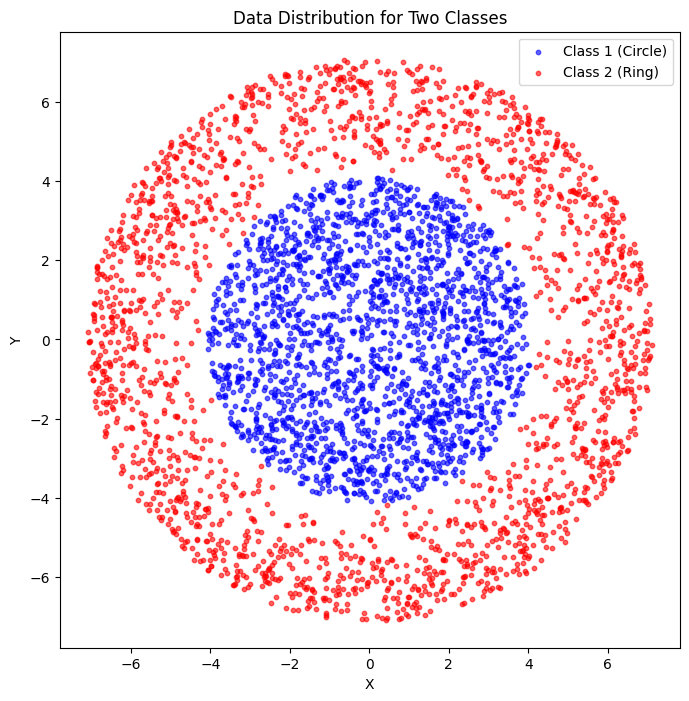

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 2000  #data points in each class
inner_radius = 4.1  #class 1 raduis
outer_radius = 4.11  #class 2 raduis
ring_width = 3   #width

#class 1
theta1 = 2 * np.pi * np.random.rand(num_points)
r1 = inner_radius * np.sqrt(np.random.rand(num_points))
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)
class1 = np.vstack((x1, y1)).T

#clas 2
theta2 = 2 * np.pi * np.random.rand(num_points)
r2 = outer_radius + ring_width * np.sqrt(np.random.rand(num_points))
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)
class2 = np.vstack((x2, y2)).T

plt.figure(figsize=(8, 8))
plt.scatter(class1[:, 0], class1[:, 1], color='b', label='Class 1 (Circle)', alpha=0.6,s=10)
plt.scatter(class2[:, 0], class2[:, 1], color='r', label='Class 2 (Ring)', alpha=0.6,s=10)
plt.legend()
plt.title('Data Distribution for Two Classes')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

data = np.vstack((class1, class2))
labels = np.hstack((np.ones(num_points), np.ones(num_points) * 2))


## Classifying 

In [8]:
from sklearn.model_selection import train_test_split


labels1 = np.ones(num_points)
labels2 = np.zeros(num_points)

x = np.vstack((class1, class2))
y = np.hstack((labels1, labels2)) # basically class 1 coordiante belongs to numeric value 1, same thing with class 2, it belongs to 0's

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# KNN

In [11]:
""" classifies the data point son the appropriate class either class 1 or 2. 
    After that depending on the classification of the point a boundary can be detrmined.
    If certain data points are misclassified in a certain area that could be a boundary.
    If certain data points in a particular region is always correctly classified it could be seen as a core
"""

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# numOfClass = 10
k = 10  # we csn try and chnage the value 

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

y_pred_train = knn.predict(x_train)
accuracy = accuracy_score(y_train, y_pred_train)

print(f'the accuarcy: {accuracy}')



KNN Training Accuracy: 1.00


'core_samples = x_train[(y_train == y_pred_train)]\nboundary_samples = x_train[(y_train != y_pred_train)]\ncore_labels = y_train[(y_train == y_pred_train)]\nboundary_labels = y_train[(y_train != y_pred_train)]'

In [13]:
core_samples = x_train[(y_train == y_pred_train)]
boundary_samples = x_train[(y_train != y_pred_train)]

print(boundary_samples)

[[-4.30759317  0.23955988]
 [ 0.57671333  4.28348753]
 [ 2.3347433  -3.57551493]
 [-2.73462199 -3.19097915]
 [-3.9878855  -1.51828068]
 [ 3.4945659   2.40921773]
 [ 0.43949841 -4.17716021]
 [-3.53420981  2.40428489]
 [-2.90613087  3.08514197]
 [ 3.46932764  2.38194179]
 [ 1.1296937  -4.23054715]
 [ 4.20452906  1.09252874]
 [ 3.78032983 -2.27041606]]
